In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
title = "Gestorbene in Österreich nach Kalenderwoche"
subtitle = "Quelle: Statistik Austria (Stand 28. Jänner 2021)"

In [3]:
csv = pd.read_csv('https://data.statistik.gv.at/data/OGD_gest_kalwo_GEST_KALWOCHE_100.csv', sep=';')
csv

,C-KALWOCHE-0,C-B00-0,C-ALTERGR65-0,C-C11-0,F-ANZ-1
0,KALW-200001,B00-1,ALTERSGR65-1,C11-1,8
1,KALW-200001,B00-1,ALTERSGR65-1,C11-2,2
2,KALW-200001,B00-1,ALTERSGR65-2,C11-1,25
3,KALW-200001,B00-1,ALTERSGR65-2,C11-2,33
4,KALW-200001,B00-2,ALTERSGR65-1,C11-1,7
...,...,...,...,...,...
39383,KALW-202102,B00-8,ALTERSGR65-2,C11-2,17
39384,KALW-202102,B00-9,ALTERSGR65-1,C11-1,27
39385,KALW-202102,B00-9,ALTERSGR65-1,C11-2,22
39386,KALW-202102,B00-9,ALTERSGR65-2,C11-1,152


In [4]:
deaths_per_week = csv.groupby('C-KALWOCHE-0').sum().squeeze()
deaths_per_week

C-KALWOCHE-0
KALW-200001    1867
KALW-200002    1902
KALW-200003    2027
KALW-200004    1940
KALW-200005    1928
               ... 
KALW-202051    2263
KALW-202052    2119
KALW-202053    1997
KALW-202101    1944
KALW-202102    1941
Name: F-ANZ-1, Length: 1098, dtype: int64

In [5]:
deaths_per_year = pd.DataFrame(columns=range(2000, 2021+1), index=pd.RangeIndex(1, 53+1, name='week'), dtype='Int64')

for yearweek, deaths in deaths_per_week.iteritems():
    year = int(yearweek[5:9])
    week = int(yearweek[9:11])
    deaths_per_year.loc[week, year] = deaths

In [6]:
deaths_per_year

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
week,,,,,,,,,,,,,,,,,,,,,
1,1867,1580,1632,1661,1718,1534,1504,1576,1686,1676,...,1546,1613,1527,1693,1634,2293,1767,1648,1614,1944
2,1902,1600,1551,1611,1649,1564,1473,1537,1705,1750,...,1545,1631,1524,1768,1626,2340,1842,1710,1702,1941
3,2027,1460,1523,1619,1661,1678,1559,1416,1624,1899,...,1565,1585,1554,1837,1608,2060,1786,1642,1797,<NA>
4,1940,1566,1639,1618,1658,1570,1524,1459,1583,1966,...,1582,1567,1441,1792,1578,1938,1714,1714,1779,<NA>
5,1928,1529,1572,1625,1723,1681,1489,1545,1610,1950,...,1518,1728,1548,1837,1609,2045,1870,1733,1947,<NA>
6,1760,1473,1543,1594,1614,1774,1658,1554,1518,1902,...,1737,1735,1659,1926,1650,1874,1938,1797,1682,<NA>
7,1666,1432,1555,1688,1581,1853,1478,1556,1532,1705,...,1873,1793,1659,1992,1621,1750,1881,1820,1721,<NA>
8,1628,1514,1605,1843,1521,1813,1525,1667,1509,1724,...,1770,1686,1581,2020,1581,1807,1951,1752,1719,<NA>
9,1566,1438,1465,1881,1604,1841,1434,1615,1583,1694,...,1787,1650,1597,1883,1714,1696,2021,1767,1768,<NA>


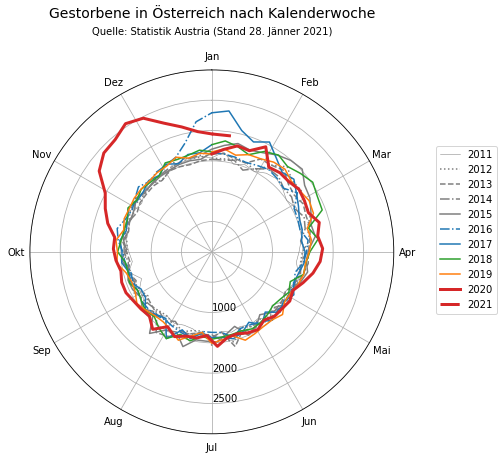

In [7]:
def data_for_year(y):
    year = deaths_per_year[y].dropna().to_numpy()
    if y == 2021:
        num_weeks = len(year)
        day_of_the_year = num_weeks*7 - 3
        theta = np.linspace(0, (day_of_the_year/365)*2*np.pi, num_weeks)
    else:
        # append first week of next year for correct radial plotting
        year = np.append(year, deaths_per_year.loc[1, y+1])
        theta = np.linspace(0, 2*np.pi, len(year))
    return (theta, year)

def plot_year(ax, y, **kwargs):
    ax.plot(*data_for_year(y), label=f"{y}", **kwargs)

def setup_polar_plot(figsize=(8, 6), constrained_layout=True):
    fig = plt.figure(figsize=figsize, constrained_layout=constrained_layout)
    ax = fig.add_subplot(111, projection='polar')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/6))
    ax.set_xticklabels(months)

    ax.set_rlabel_position(180)
    ax.set_yticklabels(['', '1000', '', '2000', '2500'])

    return fig, ax

fig, ax = setup_polar_plot()

# plot_year(ax, 2000, linewidth=0.5)
# plot_year(ax, 2001, linewidth=0.5)
# plot_year(ax, 2002, linewidth=0.5)
# plot_year(ax, 2003, linewidth=0.5)
# plot_year(ax, 2004, linewidth=0.5)
# plot_year(ax, 2005, linewidth=0.5)
# plot_year(ax, 2006, linewidth=0.5)
# plot_year(ax, 2007, linewidth=0.5)
# plot_year(ax, 2008, linewidth=0.5)
# plot_year(ax, 2009, linewidth=0.5)
# plot_year(ax, 2010, linewidth=0.5)

plot_year(ax, 2011, color='tab:gray', linewidth=0.5)
plot_year(ax, 2012, color='tab:gray', linestyle='dotted')
plot_year(ax, 2013, color='tab:gray', linestyle='dashed')
plot_year(ax, 2014, color='tab:gray', linestyle='dashdot')
plot_year(ax, 2015, color='tab:gray')
plot_year(ax, 2016, color='tab:blue', linestyle='dashdot')
plot_year(ax, 2017, color='tab:blue')
plot_year(ax, 2018, color='tab:green')
plot_year(ax, 2019, color='tab:orange')
plot_year(ax, 2020, color='tab:red', linewidth=3)
plot_year(ax, 2021, color='tab:red', linewidth=3, linestyle='dashdot')

ax.set_rmax(3000)
fig.legend(loc='center right')

fig.suptitle(title, fontsize=14, y=1.04)
ax.set_title(subtitle, fontsize=10, y=1.08)

plt.savefig('gestorbene.png', dpi=300, bbox_inches='tight', facecolor='white')

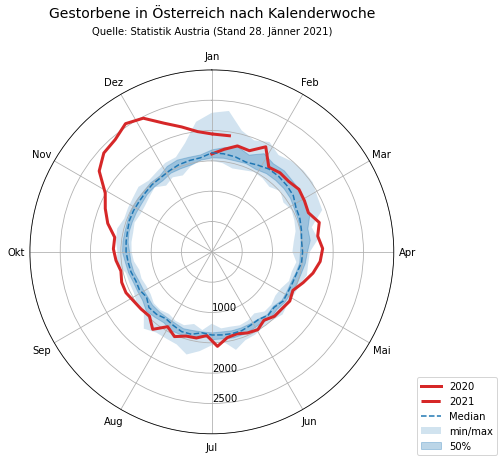

In [8]:
years = deaths_per_year.iloc[:, :-2] # excluding 2020, 2021

mean = years.mean(axis=1)
mean[53] = mean[1]

median = years.median(axis=1)
median[53] = median[1]

min = years.min(axis=1)
min[53] = min[1]

max = years.max(axis=1)
max[53] = max[1]

q25 = deaths_per_year.quantile(0.25, axis=1).astype(float)
q25[53] = q25[1]

q75 = deaths_per_year.quantile(0.75, axis=1).astype(float)
q75[53] = q75[1]

fig, ax = setup_polar_plot()

# ax.plot(np.linspace(0, 2*np.pi, len(mean)), mean, label="5y mean")
# ax.plot(np.linspace(0, 2*np.pi, len(data_for_year(2019))), data_for_year(2019), label="2019")

ax.fill_between(np.linspace(0, 2*np.pi, len(min)), min, max, alpha=0.2, label="min/max")
ax.fill_between(np.linspace(0, 2*np.pi, len(q25)), q25, q75, alpha=0.3, label="50%", color='tab:blue')

plot_year(ax, 2020, color='tab:red', linewidth=3)
plot_year(ax, 2021, color='tab:red', linewidth=3, linestyle='dashdot')

ax.plot(np.linspace(0, 2*np.pi, len(median)), median, label="Median", linestyle='dashed')


ax.set_rmax(3000)
fig.legend(loc='lower right')

fig.suptitle(title, fontsize=14, y=1.04)
ax.set_title(subtitle, fontsize=10, y=1.08)

plt.savefig('median.png', dpi=300, bbox_inches='tight', facecolor='white')

2021

2

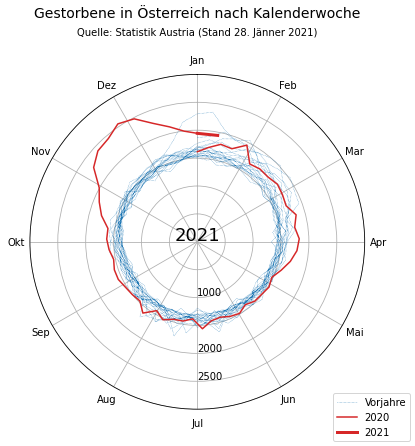

In [9]:
fig, ax = setup_polar_plot(figsize=(6, 6.2), constrained_layout=False)

# nudge ax position
pos = ax.get_position()
pos.y0 -= 0.05
pos.y1 -= 0.05
pos.x0 -= 0.012
pos.x1 -= 0.012
ax.set_position(pos)

fig.suptitle(title, fontsize=14)
ax.set_title(subtitle, fontsize=10, y=1.1)

old, = ax.plot([], [], color='tab:blue', linewidth=0.5, linestyle='dotted', label="Vorjahre")
prev, = ax.plot([], [], color='tab:blue', label="2020")
current, = ax.plot([], [], color='tab:red', linewidth=3, label="2021")
center = ax.text(0, 25, "2000", horizontalalignment='center', fontsize=18)
ax.set_rmax(3000)

start_year = 2000

def year_and_week_for_index(i):
    y = start_year
    while True:
        len_year = len(deaths_per_year[y].dropna()) + 1
        if len_year > i:
            return (y, i+1)
        else:
            y += 1
            i -= (len_year-1)

def data_for_index(i):
    y, w = year_and_week_for_index(i)
    clear_output(wait=True)
    display(y, w)
    theta, year = data_for_year(y)
    return theta[:w], year[:w]

def init():
    old.set_data([], []) 
    prev.set_data([], []) 
    current.set_data([], []) 
    center.set_text("")
    return old, prev, current, center

def animate(i):
    y = year_and_week_for_index(i)[0]

    if y == 2021:
        prev.set_color('tab:red')

    if y > start_year:
        old_theta = np.array([])
        old_data = np.array([])
        for year in range(start_year, y-1):
            theta, data = data_for_year(year)
            old_theta = np.append(old_theta, theta)
            old_data = np.append(old_data, data)
        old.set_data(old_theta, old_data)
        prev.set_data(*data_for_year(y-1))

    current.set_data(*data_for_index(i))
    center.set_text(f"{y}")
    return old, prev, current, center

num_frames = len(deaths_per_week)

anim = mpl.animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, interval=50, blit=True) 
anim.save('deaths.mp4', writer='ffmpeg', dpi=300, extra_args=['-vf', 'tpad=stop_mode=clone:stop_duration=5'])

fig.legend(loc='lower right')

plt.savefig('deaths.png', dpi=300, bbox_inches='tight', facecolor='white')

# anim.save('anim.gif', writer='imagemagick', dpi=300, savefig_kwargs={'facecolor': 'white'}) 
# plt.savefig('anim.png', dpi=300, bbox_inches='tight', facecolor='white')

# $ ffmpeg -i deaths.mp4 -vf "fps=15,scale=900:-1:flags=lanczos,split[s0][s1];[s0]palettegen[p];[s1][p]paletteuse" -loop 0 deaths.gif
